In [59]:
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.applications import VGG16

In [34]:
# create a data generator
datagen = ImageDataGenerator(rescale=1./255)

In [35]:
batch_size = 128
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [36]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('C:/Users/Usuario/Desktop/UNED/mineria_datos/Practica3_Aprendizajeprofundo/anuka1200/train/', class_mode='binary', batch_size=batch_size, shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
# load and iterate validation dataset
val_it = datagen.flow_from_directory('C:/Users/Usuario/Desktop/UNED/mineria_datos/Practica3_Aprendizajeprofundo/anuka1200/validation/', class_mode='binary', batch_size=64, target_size=(IMG_HEIGHT, IMG_WIDTH))
# load and iterate test dataset
test_it = datagen.flow_from_directory('C:/Users/Usuario/Desktop/UNED/mineria_datos/Practica3_Aprendizajeprofundo/anuka1200/test/', class_mode='binary', batch_size=64, target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [37]:
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(128, 150, 150, 3), min=0.000, max=0.980


In [46]:
# visualize images from batches
sample_training_images, _ = next(train_it)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

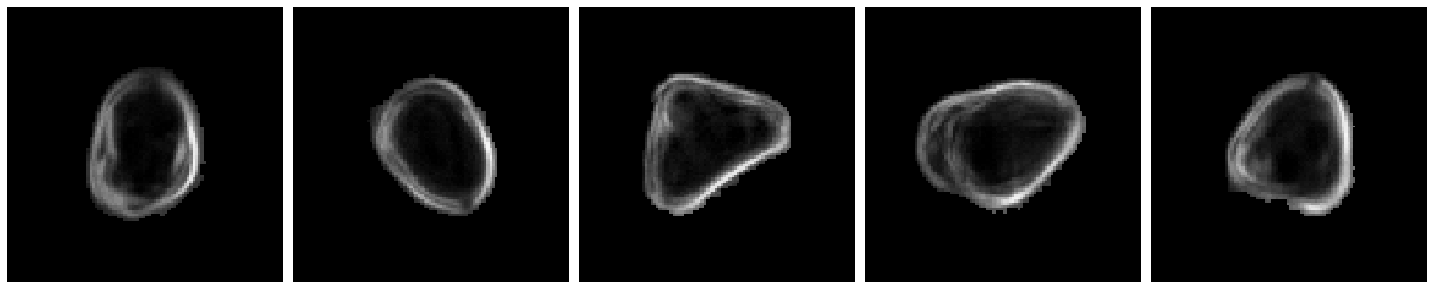

In [49]:
plotImages(sample_training_images[:5])

# Define model 1

In [40]:
# Create neural network architecture
# This is a neural network without a hidden layer
# equivalent to a logistic binomial regression
modelnet_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    keras.layers.Dense(2, activation='softmax')
])


# Compile the model
modelnet_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


modelnet_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 135002    
Total params: 135,002
Trainable params: 135,002
Non-trainable params: 0
_________________________________________________________________


In [41]:
# fit the model
total_train=1800
total_val=200
history_1 = modelnet_1.fit_generator(
    train_it,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_it,
    validation_steps=total_val // batch_size
)

Epoch 1/30
14/14 [==============================] - 2s 112ms/step - loss: 0.6998 - accuracy: 0.7243 - val_loss: 0.1612 - val_accuracy: 0.9219
Epoch 2/30
14/14 [==============================] - 1s 106ms/step - loss: 0.4241 - accuracy: 0.8397 - val_loss: 0.1797 - val_accuracy: 0.9531
Epoch 3/30
14/14 [==============================] - 2s 119ms/step - loss: 0.3237 - accuracy: 0.8565 - val_loss: 0.2784 - val_accuracy: 0.9062
Epoch 4/30
14/14 [==============================] - 1s 106ms/step - loss: 0.2986 - accuracy: 0.8774 - val_loss: 0.2124 - val_accuracy: 0.9062
Epoch 5/30
14/14 [==============================] - 2s 116ms/step - loss: 0.2776 - accuracy: 0.8840 - val_loss: 0.2027 - val_accuracy: 0.9062
Epoch 6/30
14/14 [==============================] - 1s 106ms/step - loss: 0.3023 - accuracy: 0.8761 - val_loss: 0.2418 - val_accuracy: 0.8906
Epoch 7/30
14/14 [==============================] - 2s 111ms/step - loss: 0.3770 - accuracy: 0.8481 - val_loss: 0.2315 - val_accuracy: 0.8906
Epoch 

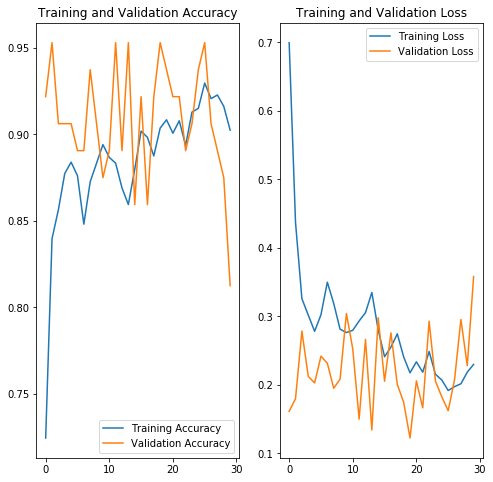

In [42]:
# Visualize training results
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [43]:
test_loss, test_acc = modelnet_1.evaluate(test_it, verbose=2)

print('\nTest accuracy:', test_acc)


7/7 - 0s - loss: 0.3997 - accuracy: 0.8525

Test accuracy: 0.8525


# Define model 2

In [13]:
# define model
# Create neural network architecture 
modelnet_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Dense(512, activation='relu'),
    Dense(128, activation='sigmoid'),
    Dense(2, activation='softmax')

])

# Compile the model
modelnet_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


modelnet_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               34560512  
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 34,626,434
Trainable params: 34,626,434
Non-trainable params: 0
_________________________________________________________________


In [14]:
# fit model
total_train=1800
total_val=200
history_2 = modelnet_2.fit_generator(
    train_it,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_it,
    validation_steps=total_val // batch_size
)

Epoch 1/30
14/14 [==============================] - 4s 312ms/step - loss: 0.7045 - accuracy: 0.6878 - val_loss: 0.3840 - val_accuracy: 0.8594
Epoch 2/30
14/14 [==============================] - 4s 305ms/step - loss: 0.3903 - accuracy: 0.8307 - val_loss: 0.3145 - val_accuracy: 0.8750
Epoch 3/30
14/14 [==============================] - 4s 253ms/step - loss: 0.3417 - accuracy: 0.8505 - val_loss: 0.3008 - val_accuracy: 0.9062
Epoch 4/30
14/14 [==============================] - 3s 246ms/step - loss: 0.3228 - accuracy: 0.8756 - val_loss: 0.3006 - val_accuracy: 0.8750
Epoch 5/30
14/14 [==============================] - 4s 281ms/step - loss: 0.3000 - accuracy: 0.8864 - val_loss: 0.3304 - val_accuracy: 0.8750
Epoch 6/30
14/14 [==============================] - 4s 273ms/step - loss: 0.3000 - accuracy: 0.8654 - val_loss: 0.2129 - val_accuracy: 0.9062
Epoch 7/30
14/14 [==============================] - 4s 261ms/step - loss: 0.2630 - accuracy: 0.8956 - val_loss: 0.3220 - val_accuracy: 0.8750
Epoch 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Usuario\Anaconda3\envs\study_env\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-59b1a5da7a10>", line 9, in <module>
    validation_steps=total_val // batch_size
  File "C:\Users\Usuario\Anaconda3\envs\study_env\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1297, in fit_generator
    steps_name='steps_per_epoch')
  File "C:\Users\Usuario\Anaconda3\envs\study_env\lib\site-packages\tensorflow_core\python\keras\engine\training_generator.py", line 265, in model_iteration
    batch_outs = batch_function(*batch_data)
  File "C:\Users\Usuario\Anaconda3\envs\study_env\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 973, in train_on_batch
    class_weight=class_weight, reset_metrics=reset_metrics)
  File "C:\Users\Usuario\Anaconda3\envs\study_env\lib\site-packages\tensorflow_core\python

KeyboardInterrupt: 

In [ ]:
# Visualize training results
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Accuracy
test_loss, test_acc = modelnet_2.evaluate(test_it, verbose=2)

print('\nTest accuracy:', test_acc)


# Evaluate model
loss = modelnet_2.evaluate_generator(test_it, steps=24)
loss

# Define 3 model

In [79]:
# Create neural network architecture
modelnet_3 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

modelnet_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


modelnet_3.summary()


In [45]:
total_train=1800
total_val=200
history_3 = modelnet_3.fit_generator(
    train_it,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_it,
    validation_steps=total_val // batch_size
)


Epoch 1/30
14/14 [==============================] - 33s 2s/step - loss: 0.4528 - accuracy: 0.7907 - val_loss: 0.3941 - val_accuracy: 0.8750
Epoch 2/30
14/14 [==============================] - 34s 2s/step - loss: 0.3333 - accuracy: 0.8672 - val_loss: 0.2603 - val_accuracy: 0.8750
Epoch 3/30
14/14 [==============================] - 34s 2s/step - loss: 0.3023 - accuracy: 0.8834 - val_loss: 0.2495 - val_accuracy: 0.8906
Epoch 4/30
14/14 [==============================] - 35s 2s/step - loss: 0.2763 - accuracy: 0.8862 - val_loss: 0.2173 - val_accuracy: 0.9219
Epoch 5/30
14/14 [==============================] - 31s 2s/step - loss: 0.2092 - accuracy: 0.9175 - val_loss: 0.3775 - val_accuracy: 0.8125
Epoch 6/30
14/14 [==============================] - 35s 2s/step - loss: 0.2024 - accuracy: 0.9174 - val_loss: 0.2431 - val_accuracy: 0.8906
Epoch 7/30
14/14 [==============================] - 37s 3s/step - loss: 0.1656 - accuracy: 0.9336 - val_loss: 0.1296 - val_accuracy: 0.9531
Epoch 8/30
14/14 [==

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Usuario\Anaconda3\envs\study_env\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-1cff5dee0788>", line 8, in <module>
    validation_steps=total_val // batch_size
  File "C:\Users\Usuario\Anaconda3\envs\study_env\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1297, in fit_generator
    steps_name='steps_per_epoch')
  File "C:\Users\Usuario\Anaconda3\envs\study_env\lib\site-packages\tensorflow_core\python\keras\engine\training_generator.py", line 265, in model_iteration
    batch_outs = batch_function(*batch_data)
  File "C:\Users\Usuario\Anaconda3\envs\study_env\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 973, in train_on_batch
    class_weight=class_weight, reset_metrics=reset_metrics)
  File "C:\Users\Usuario\Anaconda3\envs\study_env\lib\site-packages\tensorflow_core\python

KeyboardInterrupt: 

In [ ]:
# Visualize training results
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
test_loss, test_acc = modelnet_3.evaluate(test_it, verbose=5)

print('\nTest accuracy:', test_acc)


# Graph all models


In [ ]:
# Visualize training results
acc_1 = history_1.history['accuracy']
acc_2 = history_2.history['accuracy']
acc_3 = history_3.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']
val_acc_2 = history_2.history['val_accuracy']
val_acc_3 = history_3.history['val_accuracy']

In [ ]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy Net_1')
plt.plot(epochs_range, acc_2, label='Training Accuracy Net_2')
plt.plot(epochs_range, acc_3, label='Training Accuracy Net_3')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, val_acc_1, label='Training Accuracy Net_1')
plt.plot(epochs_range, val_acc_2, label='Training Accuracy Net_2')
plt.plot(epochs_range, val_acc_3, label='Training Accuracy Net_3')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

# Loss

In [ ]:
loss_1 = history_1.history['loss']
loss_2 = history_2.history['loss']
loss_3 = history_3.history['loss']
val_loss_1 = history_1.history['val_loss']
val_loss_2 = history_2.history['val_loss']
val_loss_3 = history_3.history['val_loss']

In [ ]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss_1, label='Training Accuracy Net_1')
plt.plot(epochs_range, loss_2, label='Training Accuracy Net_2')
plt.plot(epochs_range, loss_3, label='Training Accuracy Net_3')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, val_loss_1, label='Training Accuracy Net_1')
plt.plot(epochs_range, val_loss_2, label='Training Accuracy Net_2')
plt.plot(epochs_range, val_loss_3, label='Training Accuracy Net_3')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')